# Approximating the solutions of a harmonic oscilator with a neural network

The equations of motion we consider are
$$
\begin{cases}
\dot{q}(t) = p(t)\\
\dot{p}(t) = -q(t).
\end{cases}
$$
We train a neural network $\mathcal{N}_{\theta}:\mathbb{R}^2\times\mathbb{R}\to\mathbb{R}$ so it approximates the flow map of the differential equation for initial conditions in a box $\Omega = [-1.2,1.2]^2$ and time instants in the interval $[0,1]$.

In [1]:
import time as time_lib
import torch

from scripts.networks import network
from scripts.utils import *
from scripts.training import trainModel
from scripts.plotting import *

In [2]:
dtype=torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
#Domain details
t0 = 0. #initial time
tf = 100. #final time
dt = 1 #time step for which we train the network

qlb = -1.2 #lower bound values for q
qub = 1.2 #upper bound values for q
plb = -1.2 
pub = 1.2
q0 = torch.tensor([1.],dtype=dtype)
pi0 = torch.tensor([0.],dtype=dtype)
d = 2

n_train, epochs = 1000, int(5e4)
vec = vecField()

nlayers = 2
hidden_nodes = 10
act = "tanh"
dim_t = hidden_nodes
bounds = [t0,tf,qlb,qub,plb,pub]

In [4]:
is_training = input("Do you want to train the network or load a pretrained model? Write y to train it")=="y"

model = network(neurons=hidden_nodes,d=d,dt=dt,act_name=act,nlayers=nlayers,dtype=dtype) #If you want a different network
model.to(device);

lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

if is_training:
    Loss = trainModel(model,n_train,q0,pi0,dt,bounds,vec,epochs,device,dtype,optimizer,verbose=0)
    #Path to save the model
    timestamp = time_lib.strftime("%Y%m%d_%H%M%S") 
    path = f"trainedModels/trained_model_{timestamp}.pt"
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load("trainedModels/best.pt",map_location=device))
else:
    path = input("Write the path of the model to load, do not include .pt")
    model.load_state_dict(torch.load("trainedModels/"+path+".pt",map_location=device))
model.eval();
model.to('cpu');

100%|██████████| 50000/50000 [08:24<00:00, 99.19it/s] 


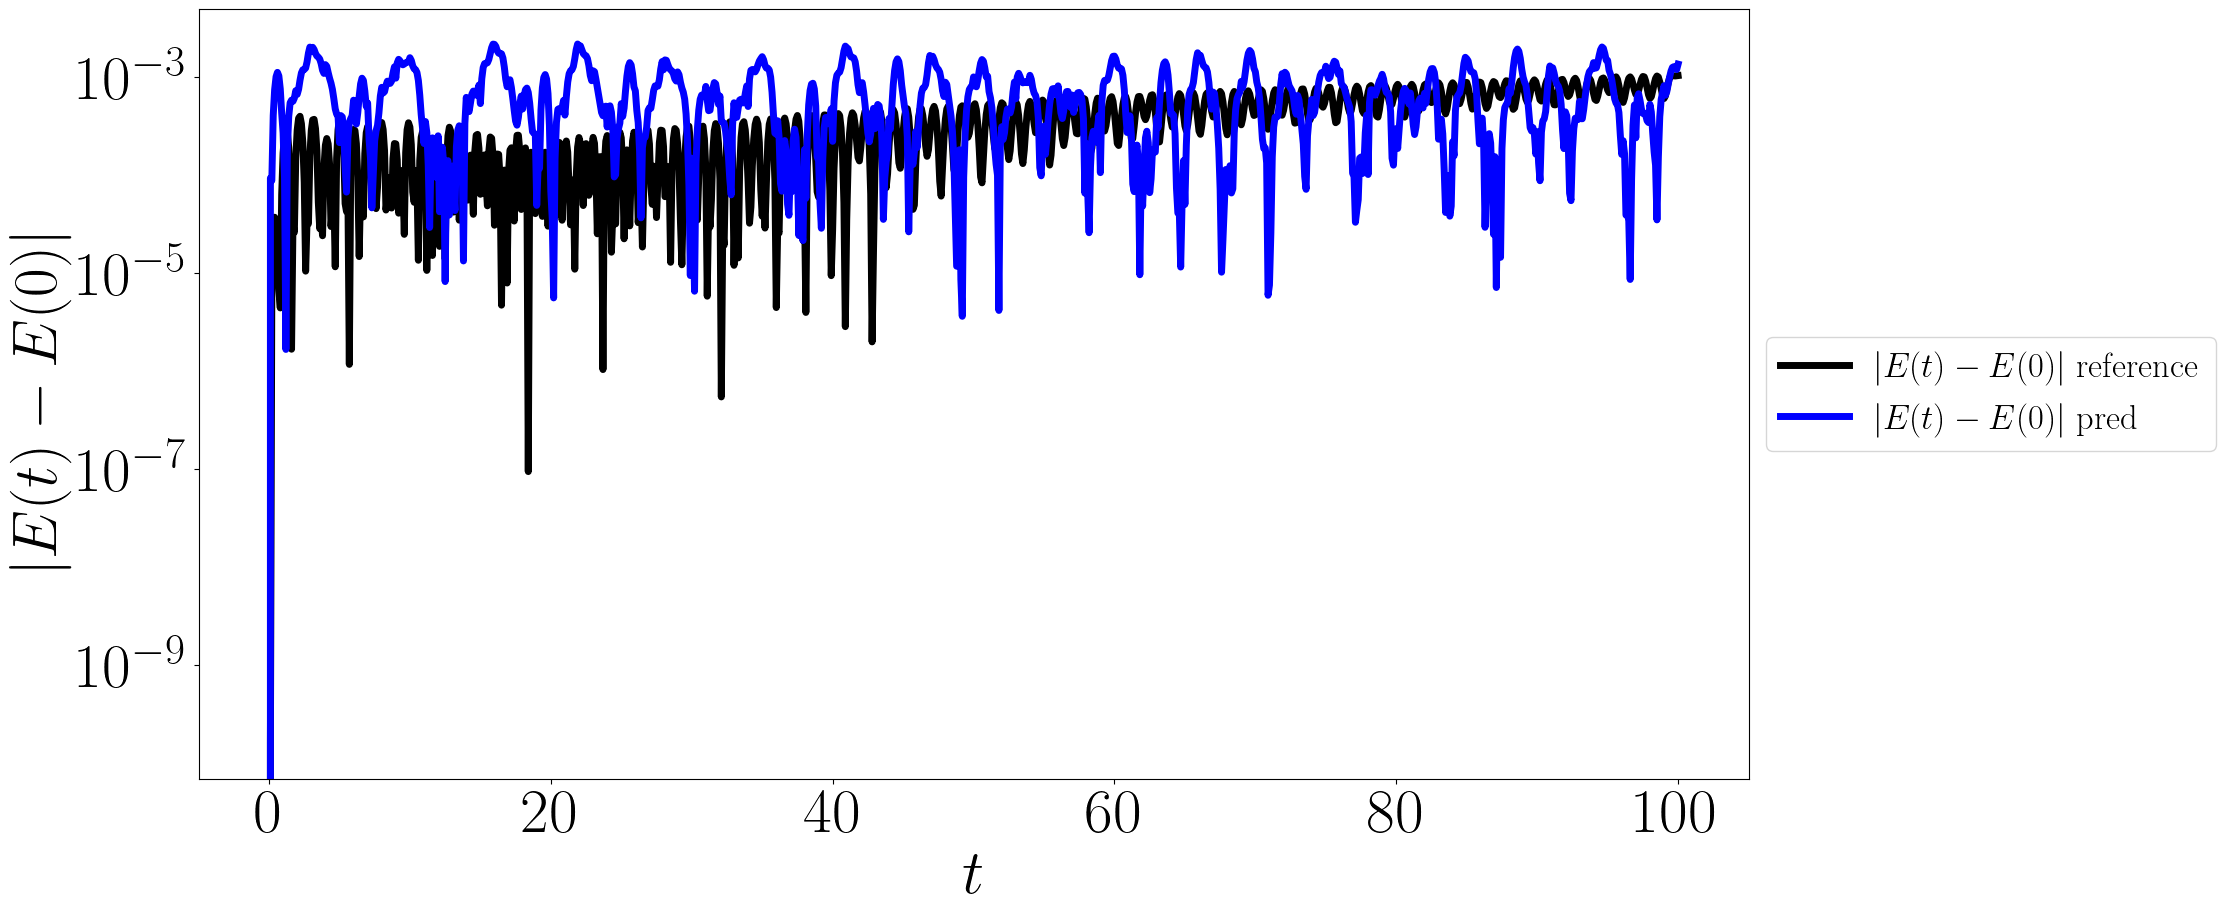

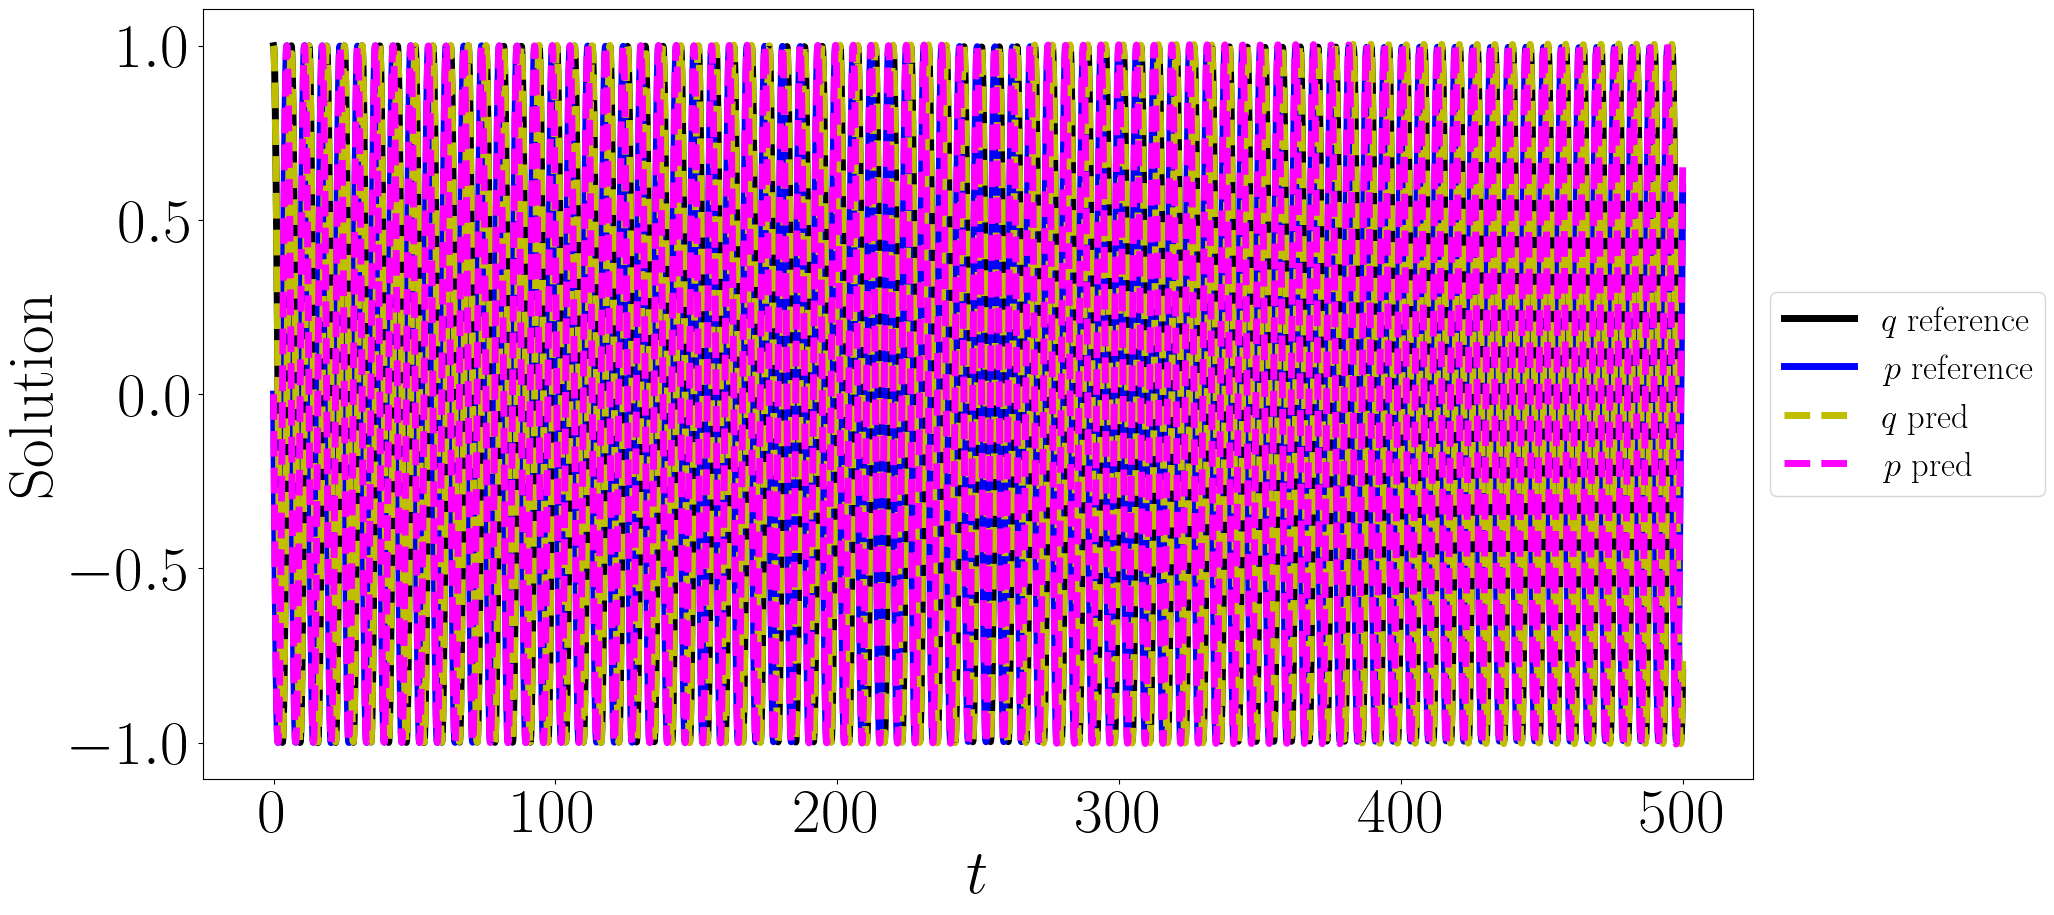

In [5]:
energyPlot(q0,pi0,100,model,dtype,device)
testPlot(q0,pi0,500,model,dtype,device)